kery


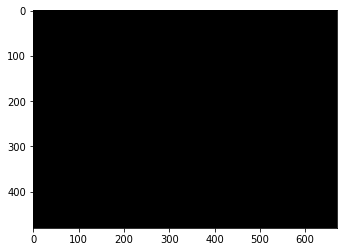

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0.14379898 0.13078353 0.16932684 0.09723811 0.11691373 0.09314648
 0.1459355  0.10285685]
class 2
helll1233
folder /home/abhi/mainproject/quickdraw/doodle/cloud
file /home/abhi/mainproject/quickdraw/doodle/cloud/mountain.jpg
/home/abhi/mainproject/quickdraw/doodle/cloud/mountain.jpg
file /home/abhi/mainproject/quickdraw/doodle/cloud/apple.jpg
/home/abhi/mainproject/quickdraw/doodle/cloud/apple.jpg
file /home/abhi/mainproject/quickdraw/doodle/cloud/car.jpg
/home/abhi/mainproject/quickdraw/doodle/cloud/car.jpg
file /home/abhi/mainproject/quickdraw/doodle/cloud/star.jpg
/home/abhi/mainproject/quickdraw/doodle/cloud/star.jpg
file /home/abhi/mainproject/quickdraw/doodle/cloud/cloud.jpg
/home/abhi/mainproject/quickdraw/doodle/cloud/cloud.jpg
file /home/abhi/mainproject/quickdraw/doodle/cloud/spreadsheet.jpg
/home/abhi/mainproject/quickdraw/doodle/cloud/spreadsheet.jpg
file /home/abhi/mainproject/quickdraw/doodle/cloud/donut.jpg
/home/a

In [4]:
# abhi final
# quickdraw + autodraw


from keras.models import load_model
import os
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import os
import numpy as np
from collections import deque
from matplotlib import pyplot as plt 
from tkinter import messagebox

global last_frame                                      #creating global              variable
last_frame = np.zeros((480, 670, 3), dtype=np.uint8)
global last_frame2                                      #creating global      variable
last_frame2 = np.zeros((480, 670, 3), dtype=np.uint8)
global cap
cap = cv2.VideoCapture(0)
global doodle_url,lmain,lmain2,quickdraw_window
global images
images=[]
global files
files=[]

blueLower = np.array([100, 60, 60])
blueUpper = np.array([140, 255, 255])
# Define a 5x5 kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Setup deques to store separate colors in separate arrays
points = deque(maxlen=1024)

#     Setup the Paint interface
paintWindow = np.zeros((480,670,3)) + 255 #paint window



global message
message=["donut","church","cloud","apple","star","car","spreadsheet","mountain"]
model=load_model("QuickDraw.h5")

flag=0
global prediction_flag
prediction_flag=0
x=0
def show_vid():
    global flag,points,paintWindow
    
    #creating a function
    if not cap.isOpened():                             #checks for the opening of camera
        print("cant open the camera")
    grabbed, frame = cap.read()
#     frame = cv2.resize(frame,(480,670))
    if grabbed is None:
        print ("Major error!")
    elif grabbed:
        
        frame = cv2.flip(frame, 1)
        key = cv2.waitKey(1)
#         print("key",key)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # Check to see if we have reached the end of the video
        blueMask = cv2.inRange(hsv, blueLower, blueUpper)
        blueMask = cv2.erode(blueMask, kernel, iterations=2)
        blueMask = cv2.morphologyEx(blueMask, cv2.MORPH_OPEN, kernel)
        blueMask = cv2.dilate(blueMask, kernel, iterations=1)

        # Find contours in the image
        cnts, x  = cv2.findContours(blueMask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        center = None

        # Check to see if any contours were found
        if len(cnts) > 0:
            # Sort the contours and find the largest one -- we
            # will assume this contour correspondes to the area of the bottle cap
            cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
            # Get the radius of the enclosing circle around the found contour
            ((x, y), radius) = cv2.minEnclosingCircle(cnt)
            # Draw the circle around the contour
            cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
            # Get the moments to calculate the center of the contour (in this case Circle)
            M = cv2.moments(cnt)

            #finding the center of the circle
            center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))

    #     press b to pause drawing
        if flag==0:
            points.appendleft(center)
        else:
            points.appendleft(None)

        # Append the next deque when no contours are detected (i.e., bottle cap reversed,blue not detected
        for i in range(1,len(points)):
            if points[i-1] is None or points[i] is None:
                continue
            cv2.line(frame, points[i - 1], points[i], (255, 0, 0), 2)
            cv2.line(paintWindow, points[i - 1], points[i], (0, 0, 0), 13)
        
        
        
        
        
        global last_frame
        last_frame = frame.copy()
        global last_frame2
        last_frame2 = paintWindow.copy()
        
        
        
        
        
        
        
#         doodle=Image.open("doodle/"+"cloud"+".jpg")
        pic = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)     #we can change the display color of the frame gray,black&white here
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(15, show_vid)


def show_vid2():
    global prediction_flag
    global paintWindow,points
#     pic2 = cv2.cvtColor(last_frame2, cv2.COLOR_RGB2GRAY)
    if prediction_flag==0:
        img2 = Image.fromarray(np.uint8(last_frame2))
        img2tk = ImageTk.PhotoImage(image=img2)
        lmain2.img2tk = img2tk
        lmain2.configure(image=img2tk)
        lmain2.after(15, show_vid2)
    if prediction_flag==1:   
        doodle=Image.open(doodle_url)
        img2tk = ImageTk.PhotoImage(image=doodle)
        lmain2.imgtk = img2tk
        lmain2.configure(image=img2tk)
        lmain2.after(15, show_vid2)
        paintWindow=np.array(doodle)
        prediction_flag=0

def erase_drawing(event):
    global points,paintWindow
    points = deque(maxlen=1024)
    paintWindow = np.zeros((480,670,3)) + 255
def stop_drawing(event):
    global flag
    flag=1
def restart_drawing(event):
    global flag
    flag=0
def process_image(img):
    image_x = 28
    image_y = 28
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img
def  predict(event,img):
    print("kery")
    global x
    global message
    global last_frame2
    global doodle_url
    global prediction_flag,paintWindow,points,quickdraw_window
    cv2.imwrite(str(x)+".jpg",paintWindow)
    i=cv2.imread(str(x)+".jpg",0)
#         i=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    digit=cv2.bitwise_not(i)
    plt.imshow(digit,cmap="gray")
    plt.show()
    processed = process_image(digit)
    print("new image",processed.shape)

    print("processed: " + str(processed.shape))
    pred_probab = model.predict(processed)[0]
    print("prob",pred_probab)
    pred_class = list(pred_probab).index(max(pred_probab))
    print("class",pred_class)
    os.remove(str(x)+".jpg")
    msg=message[pred_class]
    result=messagebox.askyesno("Prediction","did u draw a "+msg,parent=quickdraw_window)
    if result:
        print("helll1233")
        selected_doodle=suggetion(msg)
        print("selected doodle", selected_doodle)
#         doodle_url="doodle/"+msg+".jpg"
        
#         paintWindow[:,:,:] = 255
        points = deque(maxlen=1024)
        print("hellooo")
    else:
        quickdraw_window.deiconify()   
        
global url

def set_file(i,new_window):
    global doodle_url,url,files,prediction_flag
    url=files[i]
    doodle_url=url
    print("url",url,doodle_url)
    prediction_flag=1
    new_window.destroy()
    
    
def suggetion(folder_name):
    global files,images,message,url
    folder_name="/home/abhi/mainproject/quickdraw/doodle/"+folder_name
    print("folder",folder_name)
    new_window=Toplevel()
    new_window.geometry("1000x150+200+650")
    new_window.configure(background='white')
    new_window.title("Select an image from suggestions")
#     new_window.wm_attributes('-type', 'splash')
    i=0
    for file in os.listdir(folder_name):
        file=folder_name+"/"+file
#         print("file",file)
        files.append(file)
        t1 =Image.open(file)
        t=t1.resize((100, 100), Image.ANTIALIAS)
        img=ImageTk.PhotoImage(t)
        images.append(img)
        b=Button(new_window)
        print(files[i])
        b.config(image=images[i],text=file,width="100",height="100",activebackground="black",bg="black", bd=0,command= lambda i=i: set_file(i,new_window))
        b.pack(padx=10, pady=20, side=LEFT)
        i+=1
    

        
def toplevel_window():
    global lmain,lmain2,paintWindow,quickdraw_window
    quickdraw_window=Toplevel()
    frame_name1=tk.Label(master=quickdraw_window,text="Camera window")
    frame_name2=tk.Label(master=quickdraw_window,text="Drawing window")
    frame_name1.place(x=250,y=25)
    frame_name2.place(x=950,y=25)
    guide_label=tk.Label(master=quickdraw_window,text="Guide : press  R to  erase , Q to stop , S to start, P to predict ")
    guide_label.place(x=50,y=550)
    lmain = tk.Label(master=quickdraw_window)
    lmain2 = tk.Label(master=quickdraw_window)    
    lmain.place(x=20,y=50)
    lmain2.place(x=680,y=50)
    quickdraw_window.title("QuickDrawframe")            #you can give any title
    quickdraw_window.geometry("1400x1200+50+10") #size of window , x-axis, yaxis
#     exitbutton = Button(quickdraw_window, text='Quit',fg="red",command=   quickdraw_window.destroy).place(x=300,y=600)
    quickdraw_window.focus_set()
    quickdraw_window.bind("<Escape>", lambda event,quickdraw_window=quickdraw_window: quickdraw_window.destroy())
    quickdraw_window.bind("<r>", lambda event: erase_drawing(event))
    quickdraw_window.bind("<q>", lambda event: stop_drawing(event))
    quickdraw_window.bind("<s>", lambda event: restart_drawing(event))
    quickdraw_window.bind("<p>", lambda event,paintWindow=paintWindow: predict(event,paintWindow))
    show_vid()
    show_vid2()
        
if __name__ == '__main__':
    root=tk.Tk()    
    root.title("QuickDraw")            #you can give any title
    root.geometry("1400x1200+50+10") 
    #assigning root variable        for Tkinter as tk
    main_frame=tk.Frame(root,width=700,height=600)
    main_frame.place(x=350,y=100)
    logo = ImageTk.PhotoImage(Image.open("doodle/quickdraw.jpg"))

#Displaying it
    logo_label = Label(main_frame, image=logo)
    logo_label.pack()
    start_button = Button(main_frame, text='Start',width=15,bg="white",command=toplevel_window)
    start_button.pack(side=LEFT,padx=100,pady=50)
    stop_button = Button(main_frame, text='Stop',width=15,bg="white",command=root.destroy)
    stop_button.pack(side=LEFT)
#     toplevel_window()
#size of window , x-axis, yaxis
    
    root.mainloop()                                  #keeps the application in an infinite loop so it works continuosly
    cap.release()

